<a href="https://colab.research.google.com/github/genadidharma/pcvk-final-project/blob/main/Final%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import shutil as sh
import os

# Menghapus file dan folder dataset ketika ingin melakukan run ulang
if(os.path.isdir('dataset')):
    sh.rmtree('dataset')
    os.remove('dataset-zoom.zip')

In [ ]:
import gdown

# Mendownload dataset
url = 'https://drive.google.com/uc?id=1d6PB2cwFJYj90wG0a8VF4xheS3yZhQVU'
output = 'dataset.zip'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1d6PB2cwFJYj90wG0a8VF4xheS3yZhQVU
To: /content/dataset.zip
100%|██████████| 3.42M/3.42M [00:00<00:00, 154MB/s]


'dataset.zip'

In [ ]:
# Mengekstrak dataset
!unzip \dataset.zip

Archive:  dataset.zip
  inflating: dataset/Ilex_Aquifolium/Ilex_Aquifolium_09.ab.jpg  
  inflating: dataset/Ilex_Aquifolium/Ilex_Aquifolium_07.ab.jpg  
  inflating: dataset/Ilex_Aquifolium/Ilex_Aquifolium_16.ab.jpg  
  inflating: dataset/Ilex_Aquifolium/Ilex_Aquifolium_08.ab.jpg  
  inflating: dataset/Ilex_Aquifolium/Ilex_Aquifolium_02.ab.jpg  
  inflating: dataset/Ilex_Aquifolium/Ilex_Aquifolium_03.ab(1).jpg  
  inflating: dataset/Ilex_Aquifolium/Ilex_Aquifolium_02.ab(2).jpg  
  inflating: dataset/Ilex_Aquifolium/Ilex_Aquifolium_04.ab(1).jpg  
  inflating: dataset/Ilex_Aquifolium/Ilex_Aquifolium_04.ab(2).jpg  
  inflating: dataset/Ilex_Aquifolium/Ilex_Aquifolium_14.ab.jpg  
  inflating: dataset/Ilex_Aquifolium/Ilex_Aquifolium_10.ab.jpg  
  inflating: dataset/Ilex_Aquifolium/Ilex_Aquifolium_03.ab(2).jpg  
  inflating: dataset/Ilex_Aquifolium/Ilex_Aquifolium_12.ab.jpg  
  inflating: dataset/Ilex_Aquifolium/Ilex_Aquifolium_04.ab.jpg  
  inflating: dataset/Ilex_Aquifolium/Ilex_Aquifolium_

In [ ]:
from skimage.io import imshow, imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.morphology import closing
from skimage.measure import label, regionprops, regionprops_table
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
import os

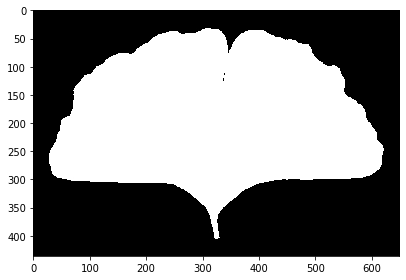

In [ ]:
# get the filenames of the leaves under the directory “Leaves”
image_path_list = os.listdir("dataset/Ginkgo_Biloba")
# looking at the first image
i = 0
image_path = image_path_list[i]
image = imread('dataset/Ginkgo_Biloba/'+image_path)
imshow(image)

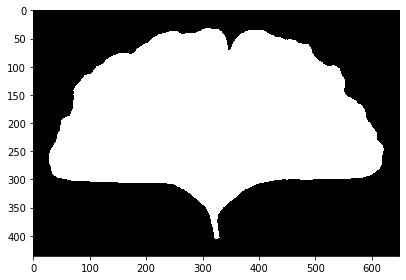

In [ ]:
binary = closing(image)
imshow(binary)

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


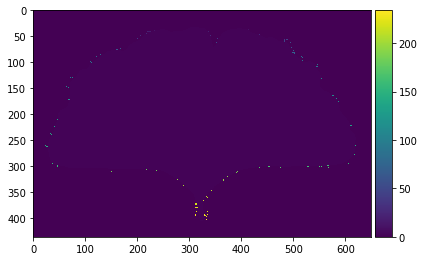

In [ ]:
label_img = label(binary)
imshow(label_img)

In [ ]:
table = pd.DataFrame(regionprops_table(label_img, image,
                                      ['convex_area', 'area',
                                      'eccentricity', 'extent',                   
                                      'inertia_tensor',
                                      'major_axis_length', 
                                      'minor_axis_length']))
table['convex_ratio'] = table['area']/table['convex_area']
table['label'] = image_path[5]
table

,convex_area,area,eccentricity,extent,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,major_axis_length,minor_axis_length,convex_ratio,label
0,1,1,0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,1.000000,o
1,156723,131025,0.855903,0.590783,21030.402304,157.901799,157.901799,5626.213773,580.096829,299.989209,0.836029,o
2,1,1,0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,1.000000,o
3,1,1,0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,1.000000,o
4,1,1,0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,1.000000,o
...,...,...,...,...,...,...,...,...,...,...,...,...
407,2,2,1.000000,1.000000,0.250000,-0.000000,-0.000000,0.000000,2.000000,0.000000,1.000000,o
408,1,1,0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,1.000000,o
409,1,1,0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,1.000000,o
410,1,1,0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,1.000000,o


In [ ]:
df = pd.DataFrame()

for path in os.listdir("dataset"):
  for image_path in os.listdir('dataset/'+path):
    image = imread('dataset/'+path+'/'+image_path)
    binary = closing(image)
    label_img = label(binary)
    
    table = pd.DataFrame(regionprops_table(label_img, image,
                            ['convex_area', 'area', 'eccentricity',
                            'extent', 'inertia_tensor',                         
                            'major_axis_length', 'minor_axis_length',
                            'perimeter', 'solidity', 'image',
                            'orientation', 'moments_central',
                            'moments_hu', 'euler_number',
                            'equivalent_diameter',
                            'mean_intensity', 'bbox']))
    table['perimeter_area_ratio'] = table['perimeter']/table['area']
    real_images = []
    std = []
    mean = []
    percent25 = []
    percent75 = []
    for prop in regionprops(label_img): 
        
        min_row, min_col, max_row, max_col = prop.bbox
        img = image[min_row:max_row,min_col:max_col]
        real_images += [img]
        mean += [np.mean(img)]
        std += [np.std(img)]
        percent25 += [np.percentile(img, 25)] 
        percent75 += [np.percentile(img, 75)]
    table['real_images'] = real_images
    table['mean_intensity'] = mean
    table['std_intensity'] = std
    table['25th Percentile'] = mean
    table['75th Percentile'] = std
    table['iqr'] = table['75th Percentile'] - table['25th Percentile']
    table['label'] = image_path[5]
    df = pd.concat([df, table], axis=0)
df.head()

,convex_area,area,eccentricity,extent,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,major_axis_length,minor_axis_length,...,bbox-1,bbox-2,bbox-3,perimeter_area_ratio,real_images,std_intensity,25th Percentile,75th Percentile,iqr,label
0,1,1,0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,0.00000,0.000000,...,289,33,290,0.000000,[[1]],0.000000,1.000000,0.000000,-1.000000,o
1,156723,131249,0.855736,0.591793,21045.845235,157.538142,157.538142,5636.334433,580.30965,300.259195,...,28,406,621,0.013434,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",125.333684,150.892354,125.333684,-25.558669,o
2,1,1,0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,0.00000,0.000000,...,373,33,374,0.000000,[[1]],0.000000,1.000000,0.000000,-1.000000,o
3,1,1,0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,0.00000,0.000000,...,375,33,376,0.000000,[[1]],0.000000,1.000000,0.000000,-1.000000,o
4,1,1,0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,0.00000,0.000000,...,378,33,379,0.000000,[[1]],0.000000,1.000000,0.000000,-1.000000,o


In [ ]:
X = df.drop(columns=['label', 'image', 'real_images'])
#features
X = X[['iqr','75th Percentile','inertia_tensor-1-1',
       'std_intensity','mean_intensity','25th Percentile',
       'minor_axis_length', 'solidity', 'eccentricity']]
#target
y = df['label']
columns = X.columns
#train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123, stratify=y)

In [ ]:
clf = GradientBoostingClassifier(n_estimators=50, max_depth=3, random_state=123)
clf.fit(X_train, y_train)
#print confusion matrix of test set
print(classification_report(clf.predict(X_test), y_test))
#print accuracy score of the test set
print(f"Test Accuracy: {np.mean(clf.predict(X_test) == y_test)*100:.2f}%")

              precision    recall  f1-score   support

           A       0.00      1.00      0.00         3
           d       1.00      0.68      0.81     10845
           o       0.01      0.80      0.03        35

    accuracy                           0.68     10883
   macro avg       0.34      0.83      0.28     10883
weighted avg       1.00      0.68      0.80     10883

Test Accuracy: 67.62%
